# **Supervised Machine Learning**
### Week 3: Forge & Build Your First ML Model


**Outcome:**
*   Train & test your first ML models (Regression + Classification).
*   Evaluate models using proper metrics.
*   Visualize results to understand model performance.
*   Gain confidence in applying an end-to-end ML workflow on real datasets.

#**General ML Work-Flow**
1. Data Collection
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Training
5. Testing
6. Evaluation
7. Visualization
8. Improvement

# **What is Supervised Machine Learning?**
A type of machine learning where the model learns from labeled data (input features X and output labels y).


### **Major Types of Supervised Learning:**
1. **Regression** - Predicts a continuous numerical value.
2. **Classification** - Predicts a category or class label.


#**Problems**
###**1. Underfitting**
The model is too simple and fails to capture the underlying patterns in the data.

**Reason:**
* Using too few features
* Too simple algorithm (e.g., Linear Regression on non-linear data)
* Not enough training

**Signs:**
* High error on training set
* High error on test set (both bad)

**Example:**
Predicting house prices using only number of rooms, ignoring location, size, etc.

---

###**2. Overfitting**
The model is too complex and learns not only the patterns but also the noise in training data.

**Reason:**
* Too many features
* Very complex algorithm (deep trees, high-degree polynomials)
* Not enough data / too small dataset

**Signs:**
* Low error on training set (very good)
* High error on test set (bad generalization)

**Example:**
A spam filter that memorizes specific training emails but fails to detect new spam with slightly different wording.

#**Regression**

Predicts a continuous numerical value based on input features.

####**Examples:**
* Predicting house prices from size & location.
* Forecasting stock prices
* Estimating temperature tomorrow

####**Common Models:**

* Linear Regression
* Polynomial Regression
* Decision Tree Regressor
* Random Forest Regressor

####**Regression Metrics**

* MSE
* MAE
* R²

# **Model-1**
### **Linear Regression**
#### Custom Dataset is used

###**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###**Data Collection**

In [ ]:
df = pd.read_csv("house_prices.csv")
print("Dataset shape:", df.shape)         # Returns (rows, cols) of dataframe
df.head()


Dataset shape: (500, 7)


,area_sqft,bedrooms,bathrooms,floors,age,distance_city_center_km,price
0,3774,4.0,2.0,2,16,1.881225,1391953
1,1460,5.0,2.0,1,11,27.997512,738086
2,1894,2.0,2.0,2,21,20.996276,729628
3,1730,4.0,4.0,2,16,20.618888,833404
4,1695,2.0,3.0,1,9,7.254579,690461


###**Data Preprocessing**

In [ ]:
# Find missing values
print("Missing values before:\n", df.isnull().sum())

Missing values before:
 area_sqft                   0
bedrooms                   10
bathrooms                  10
floors                      0
age                         0
distance_city_center_km     0
price                       0
dtype: int64


In [ ]:
# Fill missing values with median
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].median())

print("Missing values after:\n", df.isnull().sum())

Missing values after:
 area_sqft                  0
bedrooms                   0
bathrooms                  0
floors                     0
age                        0
distance_city_center_km    0
price                      0
dtype: int64


###**Exploratory Data Analysis**

In [ ]:
# Summary statistics
print(df.describe())

         area_sqft    bedrooms   bathrooms      floors         age  \
count   500.000000  500.000000  500.000000  500.000000  500.000000   
mean   2347.620000    3.046000    2.474000    1.470000   14.720000   
std     967.729667    1.447783    1.095319    0.499599    8.618245   
min     601.000000    1.000000    1.000000    1.000000    0.000000   
25%    1555.750000    2.000000    2.000000    1.000000    7.000000   
50%    2318.500000    3.000000    2.000000    1.000000   14.000000   
75%    3199.500000    4.000000    3.000000    2.000000   22.000000   
max    3997.000000    5.000000    4.000000    2.000000   29.000000   

       distance_city_center_km         price  
count               500.000000  5.000000e+02  
mean                 15.490378  9.138464e+05  
std                   8.276823  3.050167e+05  
min                   1.093330  2.988810e+05  
25%                   8.130512  6.494295e+05  
50%                  15.977753  9.162190e+05  
75%                  22.383911  1.189925

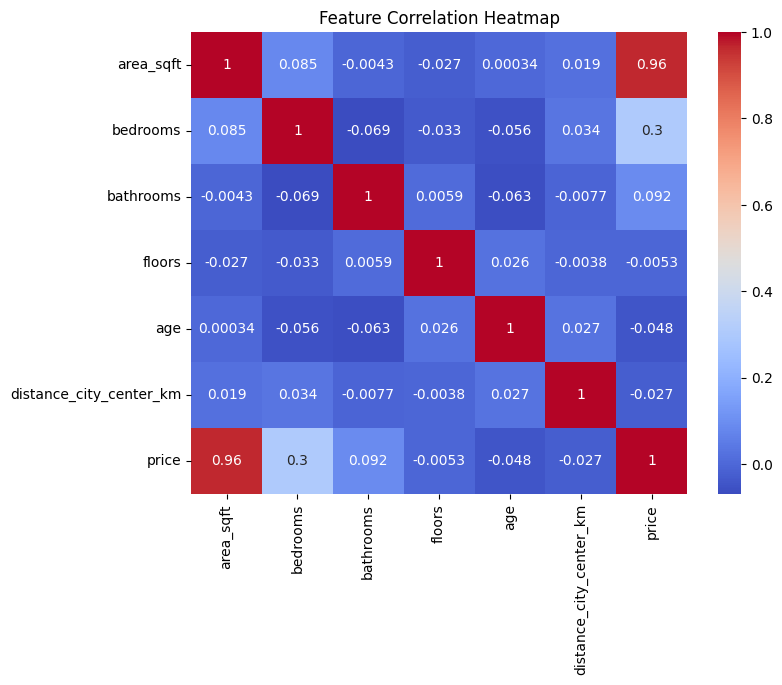

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

###**Model Training**

In [ ]:
# Data Splitting

# Features & Target
X = df.drop("price", axis=1)
y = df["price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###**Model Testing**

In [ ]:
# Model Prediction
y_pred = model.predict(X_test)

###**Model Evaluation**

In [ ]:
# Evaluation Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 534706557.8750129
MAE: 18169.409563642912
R² Score: 0.9941289037549984


###**Visualization**

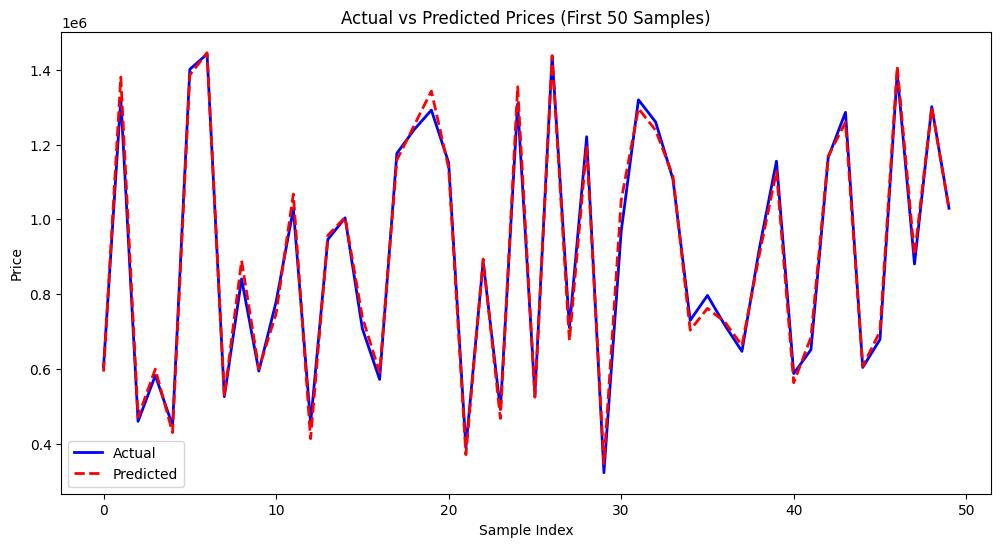

In [ ]:
# Line Graph for first 50 samples
plt.figure(figsize=(12,6))
plt.plot(y_test.iloc[:50].values, label="Actual", color="blue", linewidth=2)
plt.plot(y_pred[:50], label="Predicted", color="red", linestyle="dashed", linewidth=2)
plt.legend()
plt.title("Actual vs Predicted Prices (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.show()



# **Model-2**
### **Linear Regression**
#### Diabetes Dataset (from sklearn)

###**Data Collection**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Collection
# Load dataset directly from sklearn
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


###**Data Preprocessing**

In [ ]:
# Rename target column for clarity
df.rename(columns={"target": "disease_progression"}, inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64


###**Exploratory Data Analysis**

In [ ]:
# Basic statistics
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

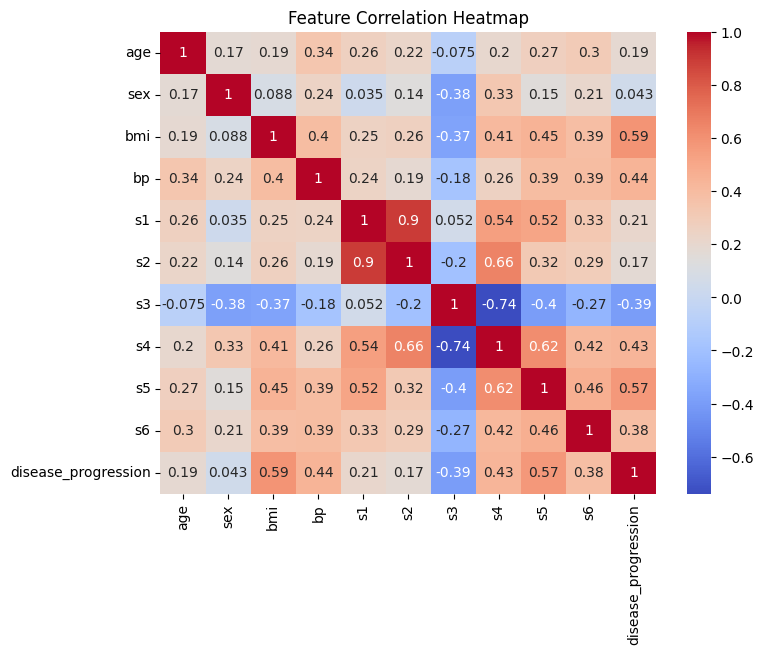

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

###**Model Training & Testing**

In [ ]:
# Feature & Target Split
X = df.drop("disease_progression", axis=1)
y = df["disease_progression"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Testing
y_pred = model.predict(X_test)

###**Evaluation**

In [ ]:
# Evaluation Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 2900.1936284934814
MAE: 42.79409467959994
R² Score: 0.4526027629719195


###**Visualization**

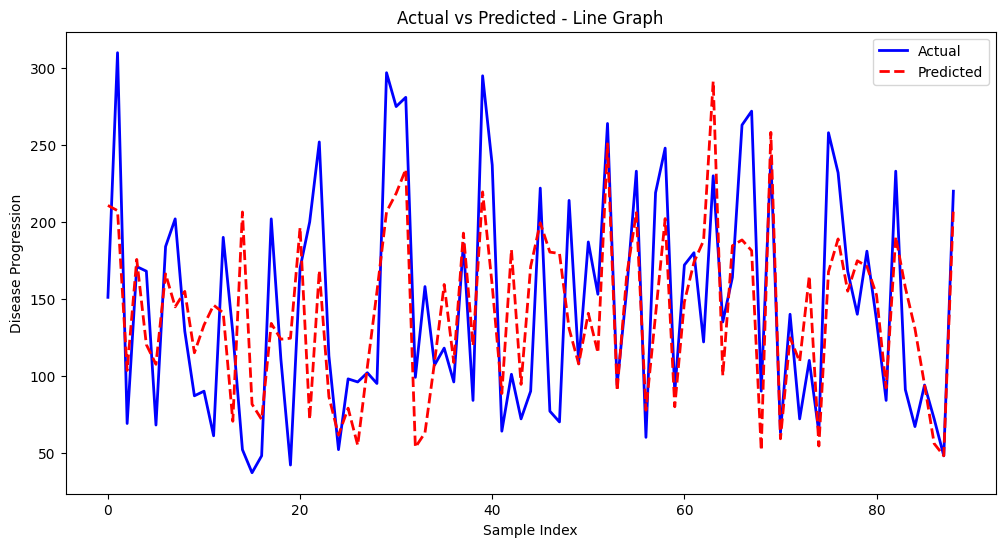

In [ ]:
# Sort values by index to align Actual & Predicted
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()

# Line Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_sorted.values, label="Actual", color="blue", linewidth=2)
plt.plot(y_pred_sorted.values, label="Predicted", color="red", linestyle="dashed", linewidth=2)
plt.legend()
plt.title("Actual vs Predicted - Line Graph")
plt.xlabel("Sample Index")
plt.ylabel("Disease Progression")
plt.show()


#**Classification**
Predicts a category/class label (discrete output).

####**Examples:**
* Email → Spam / Not Spam
* Flower type → Setosa / Versicolor / Virginica (Iris dataset)
* Disease diagnosis → Positive / Negative

####**Common Models:**
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Machine (SVM)
* k-Nearest Neighbors (kNN)


####**Classification Metrics:**
* Accuracy
* Confusion Matrix
* Precision
* Recall (Sensitivity)
* F1 Score

###**Import Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

###**Data Collection**

In [ ]:
# Load Dataset
df = pd.read_csv("titanic.csv")
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###**Data Preprocessing**

In [ ]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Drop irrelevant columns
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [ ]:
# Fill missing Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing Embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Convert categorical → numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

print("Missing values:\n", df.isnull().sum())


Missing values:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


###**Model Training & Testing**

In [ ]:
# Features & Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Training
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)


###**Evaluation**

In [ ]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724


###**Visualization**

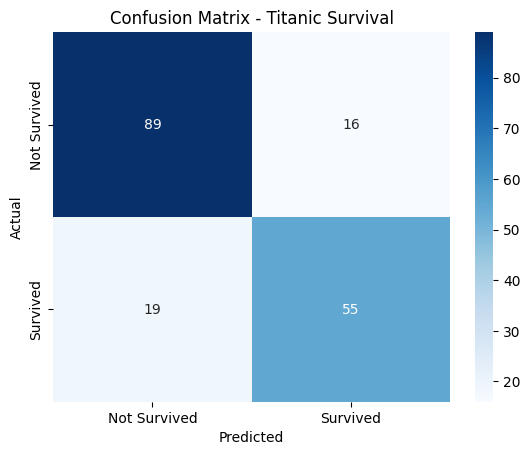

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic Survival")
plt.show()